In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [25]:
# Does the bias depend on race? What about bi-racial cases?
# Changes based on age
# changes based on education
# changes based on political affiliation
# what are the views of other races except white and black
# Does the weapon bias if they live outside USA
# what if they live in "historically racist" locations
# Is it possible to use other datasources to come up with a model to predict if an user supports firearm regulation laws



### Read Dataset

In [27]:
df = pd.DataFrame()

for dataset in ['weapons_2017']:
    df = df.append(pd.read_csv(dataset+'.csv',error_bad_lines=False))

print(df.shape)
df.head()

(157022, 81)


,Unnamed: 0,session_id,session_status,study_name,date,month,day,year,hour,weekday,...,MSAName,religion2014,religionid,iatevaluations001,iatevaluations002,iatevaluations003,broughtwebsite,user_id,previous_session_id,previous_session_schema
0,1,2625899677,,Demo.Weapons.0002,13702608402,1,1,2017,0,1,...,...,NaN,NaN,NaN,NaN,NaN,. ...,-1,2.625900e+09,s
1,2,2625899684,,Demo.Weapons.0002,13702608654,1,1,2017,0,1,...,...,7.0,1.0,NaN,NaN,NaN,. ...,-1,NaN,
2,3,2625899700,,Demo.Weapons.0002,13702609069,1,1,2017,0,1,...,...,2.0,3.0,NaN,NaN,NaN,. ...,-1,NaN,
3,4,2625899718,,Demo.Weapons.0002,13702609500,1,1,2017,0,1,...,...,7.0,1.0,NaN,NaN,NaN,. ...,-1,2.625900e+09,s
4,5,2625899729,,Demo.Weapons.0002,13702609673,1,1,2017,0,1,...,...,NaN,NaN,NaN,NaN,NaN,. ...,-1,2.625900e+09,s


### Remove IAT entries that have not been completed 

In [28]:
completed_attempts = df.session_status.str.contains('C')
df = df.loc[completed_attempts]
print(df.shape)

(76791, 81)


### Remove IAT entries who have not submitted their DoB, birthsex and Race

In [29]:
df.dropna(subset=['birthyear'], how='all', inplace = True)
print(df.shape)

df.dropna(subset=['birthsex'], how='all', inplace = True)
print(df.shape)

df.dropna(subset=['raceomb_002'], how='all', inplace = True)
print(df.shape)

# df.dropna(subset=['anninc'], how='all', inplace = True)

df.head()

(68360, 81)
(68200, 81)
(62939, 81)


,Unnamed: 0,session_id,session_status,study_name,date,month,day,year,hour,weekday,...,MSAName,religion2014,religionid,iatevaluations001,iatevaluations002,iatevaluations003,broughtwebsite,user_id,previous_session_id,previous_session_schema
6,7,2625899744,C,Demo.Weapons.0002,13702609916,1,1,2017,0,1,...,"Brownsville-Harlingen, TX MSA ...",8.0,3.0,Moderately,Slightly,Not at all,Assignment for work ...,-1,2.625900e+09,s
7,8,2625899798,C,Demo.Weapons.0002,13702611518,1,1,2017,0,1,...,TX NONMETROPOLITAN AREA ...,8.0,1.0,Not at all,Not at all,Not at all,Other ...,-1,NaN,
9,10,2625899845,C,Demo.Weapons.0002,13702612860,1,1,2017,1,1,...,"Anchorage, AK MSA ...",7.0,1.0,Not at all,Not at all,Very,Other ...,-1,NaN,
10,11,2625899864,C,Demo.Weapons.0002,13702613435,1,1,2017,1,1,...,"Los Angeles-Long Beach-Santa Ana, CA MSA ...",2.0,3.0,Moderately,Moderately,Moderately,null ...,-1,2.625900e+09,s
13,14,2625899937,C,Demo.Weapons.0002,13702615331,1,1,2017,2,1,...,"Chicago-Naperville-Joliet, IL-IN-WI MSA ...",7.0,2.0,Moderately,Moderately,Not at all,Mention in a news story (any medium) ...,-1,NaN,


   #### Explicit Associations submitted voluntarily by user

In [30]:
#df[['session_id','birthsex','assocareer','assofamily','impcareer','impfamily']]

#### User's personal info

In [31]:
#df[['session_id','birthsex','anninc','primary1','num_primary1a','secondary1','num_secondary1a','occuself']]

#### User's IAT test scores  - Find out what each metric stands for !

In [32]:
score_df = df[['session_id','raceomb_002','D_biep.Black_Weapons_all','D_biep.Black_Weapons_36','D_biep.Black_Weapons_47']]
score_df.head()

,session_id,raceomb_002,D_biep.Black_Weapons_all,D_biep.Black_Weapons_36,D_biep.Black_Weapons_47
6,2625899744,7.0,-0.523498,-0.556389,-0.490606
7,2625899798,7.0,0.828545,0.692142,0.964949
9,2625899845,6.0,0.187051,0.334409,0.039693
10,2625899864,2.0,0.926312,1.325820,0.526803
13,2625899937,8.0,0.344717,0.792235,-0.102801


#### Plot IAT D scores - Red Threshold(Black - Weapon), Green Threshold(White - Weapon)

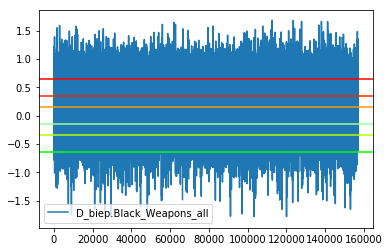

In [33]:
# https://implicit.harvard.edu/implicit/canada/background/weightinfo.html

score_df.plot(y='D_biep.Black_Weapons_all')
plt.axhline(y=.15, color='#FF9900')
plt.axhline(y=.35, color='#FF2200')
plt.axhline(y=.65, color='#FF0000')

plt.axhline(y=-0.15, color='#99FF99')
plt.axhline(y=-0.35, color='#BBFF00')
plt.axhline(y=-0.65, color='#00FF00')

plt.show()

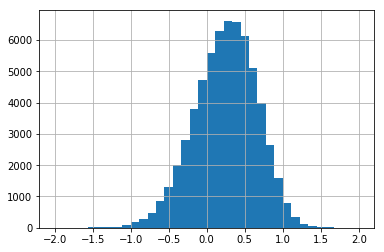

In [41]:
pd.Series(df['D_biep.Black_Weapons_all']).hist(bins=36, range=(-2,2))

In [38]:
fem_career_slight = score_df[(score_df['D_biep.Black_Weapons_all'] >= -0.15) & (score_df['D_biep.Black_Weapons_all'] <= 0.0)]
fem_career_moderate = score_df[(score_df['D_biep.Black_Weapons_all'] >= -0.35) & (score_df['D_biep.Black_Weapons_all'] <= -0.15)]
fem_career_heavy = score_df[(score_df['D_biep.Black_Weapons_all'] <= -0.35)]

male_career_slight = score_df[(score_df['D_biep.Black_Weapons_all'] >= 0.0) & (score_df['D_biep.Black_Weapons_all'] <= 0.15)]
male_career_moderate = score_df[(score_df['D_biep.Black_Weapons_all'] >= 0.15) & (score_df['D_biep.Black_Weapons_all'] <= 0.35)]
male_career_heavy = score_df[(score_df['D_biep.Black_Weapons_all'] >= 0.35)]


print ("---------Statistics---------")
print ("Total records:", len(score_df))
print ("------------Black------------")
print ("Black-Career-Slight: %f - %f%%"%(len(male_career_slight), (len(male_career_slight)/float(len(score_df))) * 100))
print ("Black-Career-Moderate: %f - %f%%"%(len(male_career_moderate), (len(male_career_moderate)/float(len(score_df))) * 100))
print ("Black-Career-Heavy: %f - %f%%"%(len(male_career_heavy), (len(male_career_heavy)/float(len(score_df))) * 100))
print ("-----------White-----------")
print ("White-Career-Slight: %f - %f%%"%(len(fem_career_slight), (len(fem_career_slight)/float(len(score_df))) * 100))
print ("White-Career-Moderate: %f - %f%%"%(len(fem_career_moderate), (len(fem_career_moderate)/float(len(score_df))) * 100))
print ("White-Career-Heavy: %f - %f%%"%(len(fem_career_heavy), (len(fem_career_heavy)/float(len(score_df))) * 100))


---------Statistics---------
Total records: 62939
------------Black------------
Black-Career-Slight: 7668.000000 - 12.183225%
Black-Career-Moderate: 11810.000000 - 18.764200%
Black-Career-Heavy: 26422.000000 - 41.980330%
-----------White-----------
White-Career-Slight: 6229.000000 - 9.896884%
White-Career-Moderate: 5436.000000 - 8.636934%
White-Career-Heavy: 4988.000000 - 7.925134%
